In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from split.model import Model
import datasets.ICDAR
import PIL
from matplotlib import pyplot as plt

In [2]:
def run_model_on_random_input(model):
    height = 100
    width = 200
    random_image = tf.random.uniform(shape=(1, height, width, 3), minval=0, maxval=256, dtype='int32')
    m(random_image)

In [3]:
m = Model()
run_model_on_random_input(m)
m.load_weights('/tmp/model.ckpt')

2022-01-27 07:43:30.373097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 07:43:30.382443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 07:43:30.382784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-27 07:43:30.383825: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
ds = tfds.load('ICDAR', split='train[90%:]')

In [5]:
def get_predictions(test_image):
    test_image = tf.expand_dims(test_image, 0)
    outputs = m(test_image)
    return (
        tf.squeeze(outputs['horz_split_points_binary'], 0),
        tf.squeeze(outputs['vert_split_points_binary'], 0)
    )

2022-01-27 07:47:06.610048: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


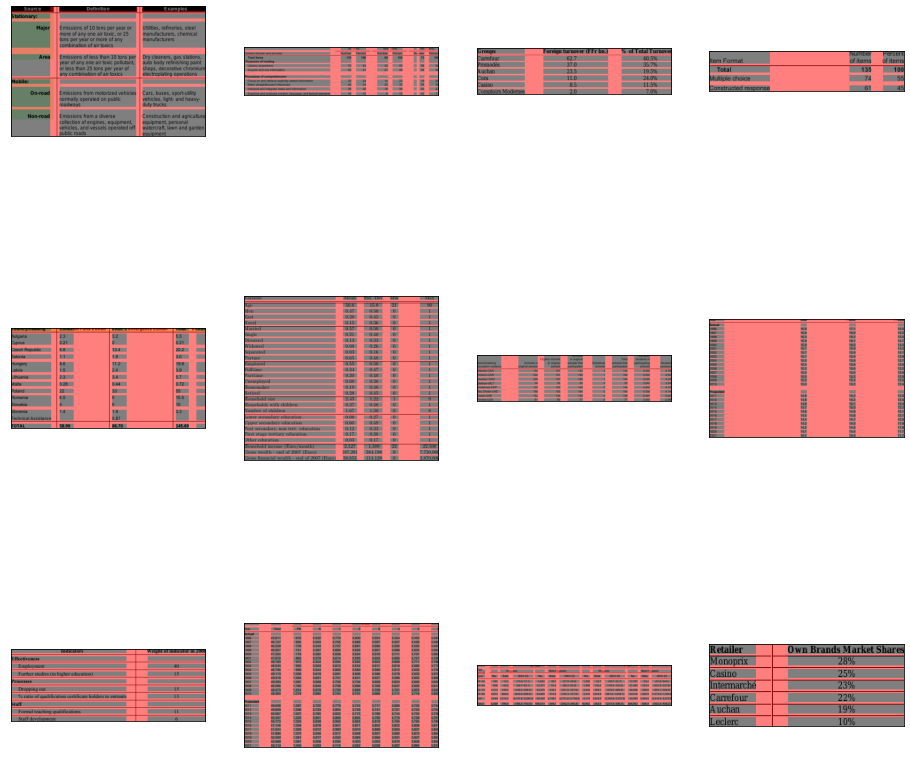

In [6]:
fig, axes = plt.subplots(3, 4, figsize=(16,16))

for element, ax in zip(ds.take(12), axes.flat):
    horz_split_points_predictions, vert_split_points_predictions = get_predictions(element['image'])
    pil_image = PIL.Image.fromarray(element['image'].numpy())
    debug_image = datasets.ICDAR.ICDAR.create_debug_image(
        pil_image, horz_split_points_predictions, vert_split_points_predictions)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(debug_image)
plt.show()